In [1]:
import numpy as np
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
%%time
hist = model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4067 - accuracy: 0.8724
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0930 - accuracy: 0.9721
Epoch 3/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0706 - accuracy: 0.9788
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0574 - accuracy: 0.9817
Epoch 5/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0475 - accuracy: 0.9852
Epoch 6/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0417 - accuracy: 0.9870
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 9/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step - l

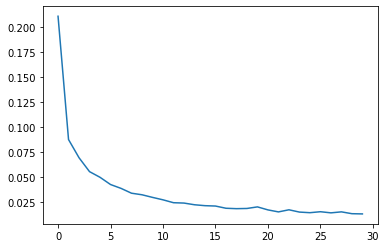

In [7]:
plt.plot(hist.history["loss"])